# Modelo de subasta

In [10]:
# Librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Ruta del archivo
ruta = './Datos/ebay.csv'

# Definir los nombres de las columnas
columnas = [
    'auctionid',    # ID de subasta
    'bid',          # Monto de la puja
    'bidtime',      # Tiempo desde el inicio de la subasta
    'bidder',       # Nombre del postor
    'bidderrate',   # Reputación del postor
    'openbid',      # Precio inicial
    'price',        # Precio final de la subasta
    'item',         # Tipo de producto
    'auctiontype'   # Tipo de subasta
]

# Cargar el CSV con encabezados definidos
df = pd.read_csv(ruta, header=None, names=columnas)

# Ver los primeros registros
df


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auctiontype
0,8213034705,95.0,2.927373,jake7870,0,95.00,117.5,xbox,3
1,8213034705,115.0,2.943484,davidbresler2,1,95.00,117.5,xbox,3
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.00,117.5,xbox,3
3,8213034705,117.5,2.998947,daysrus,10,95.00,117.5,xbox,3
4,8213060420,2.0,0.065266,donnie4814,5,1.00,120.0,xbox,3
...,...,...,...,...,...,...,...,...,...
10649,3406945791,220.0,6.607860,robb1069,3,9.99,232.5,palm,7
10650,3406945791,225.0,6.607990,robb1069,3,9.99,232.5,palm,7
10651,3406945791,230.0,6.608150,robb1069,3,9.99,232.5,palm,7
10652,3406945791,230.0,6.676380,jaguarhw,1,9.99,232.5,palm,7


Descripción de columnas:

- `auctionid`: Identificador único de la subasta.
- `bid`: Monto de la oferta realizada por el postor.
- `bidtime`: Tiempo en que se realizó la puja (medido en días desde el inicio de la subasta).
- `bidder`: Identificador del postor (usuario).
- `bidderrate`: Calificación o reputación del postor al momento de la puja.
- `openbid`: Monto de la oferta inicial de la subasta.
- `price`: Precio final alcanzado por el producto al cerrar la subasta.
- `item`: Tipo o categoría del producto subastado (por ejemplo, palm, xbox, etc.).
- `auctiontype`: Tipo de subasta según configuración (valor numérico que puede representar duración o modalidad).


## Analisis Exploratorio

In [12]:
# Revisar tipos de datos
df.dtypes

auctionid        int64
bid            float64
bidtime        float64
bidder          object
bidderrate       int64
openbid        float64
price          float64
item            object
auctiontype      int64
dtype: object

In [13]:
df['auctionid'] = df['auctionid'].astype('category')


In [14]:
# Revisar tipos de datos
df.dtypes

auctionid      category
bid             float64
bidtime         float64
bidder           object
bidderrate        int64
openbid         float64
price           float64
item             object
auctiontype       int64
dtype: object

In [15]:
# Revisión de nulos
df.isnull().sum()

auctionid      0
bid            0
bidtime        0
bidder         0
bidderrate     0
openbid        0
price          0
item           0
auctiontype    0
dtype: int64

In [16]:
# Ver cuántas filas duplicadas hay
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# (Opcional) Ver las filas duplicadas
df_duplicadas = df[df.duplicated()]
df_duplicadas.head()

Número de filas duplicadas: 0


,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auctiontype


In [17]:
# Estadísticas básicas
df.describe().round(2)

,bid,bidtime,bidderrate,openbid,price,auctiontype
count,10654.00,10654.00,10654.00,10654.00,10654.00,10654.00
mean,207.94,3.98,31.98,52.36,335.64,5.94
std,323.37,2.35,120.68,168.65,433.94,1.59
min,0.01,0.00,-4.00,0.01,26.00,3.00
25%,72.00,1.95,1.00,1.00,187.52,5.00
50%,140.00,4.13,5.00,4.99,229.04,7.00
75%,210.00,6.44,21.00,50.00,255.00,7.00
max,5400.00,7.00,3140.00,5000.00,5400.00,7.00


---

### Dejaremos solo valores 0 a 100 la columna ``bidderrate``

In [18]:
df['bidderrate'] = df['bidderrate'].clip(lower=0, upper=100)
df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auctiontype
0,8213034705,95.0,2.927373,jake7870,0,95.00,117.5,xbox,3
1,8213034705,115.0,2.943484,davidbresler2,1,95.00,117.5,xbox,3
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.00,117.5,xbox,3
3,8213034705,117.5,2.998947,daysrus,10,95.00,117.5,xbox,3
4,8213060420,2.0,0.065266,donnie4814,5,1.00,120.0,xbox,3
...,...,...,...,...,...,...,...,...,...
10649,3406945791,220.0,6.607860,robb1069,3,9.99,232.5,palm,7
10650,3406945791,225.0,6.607990,robb1069,3,9.99,232.5,palm,7
10651,3406945791,230.0,6.608150,robb1069,3,9.99,232.5,palm,7
10652,3406945791,230.0,6.676380,jaguarhw,1,9.99,232.5,palm,7


c:\Users\jeane_bkpplgv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


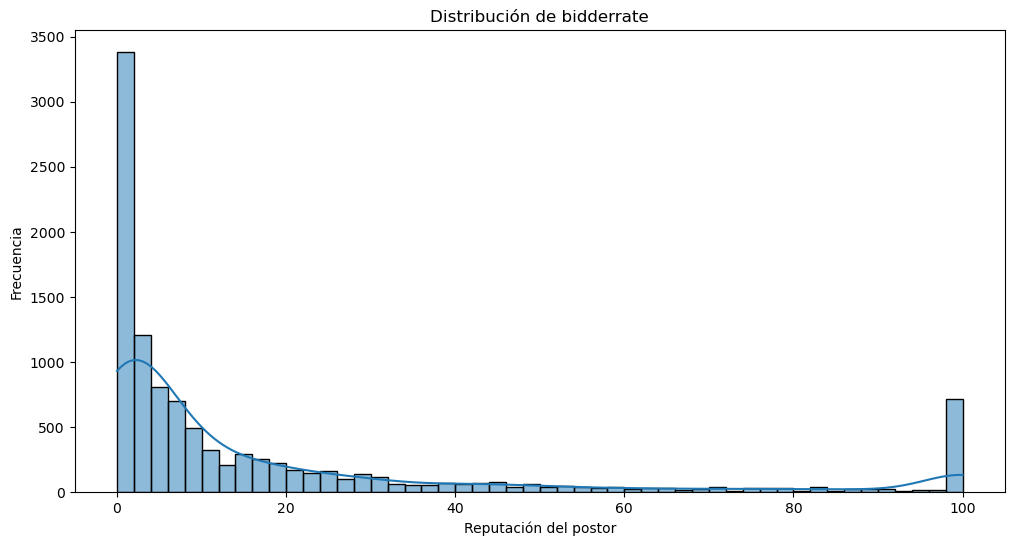

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bidderrate'], bins=50, kde=True)
plt.title('Distribución de bidderrate')
plt.xlabel('Reputación del postor')
plt.ylabel('Frecuencia')
plt.show()


---

In [20]:
# Estadísticas básicas
df.describe().round(2)

,bid,bidtime,bidderrate,openbid,price,auctiontype
count,10654.00,10654.00,10654.00,10654.00,10654.00,10654.00
mean,207.94,3.98,18.38,52.36,335.64,5.94
std,323.37,2.35,28.58,168.65,433.94,1.59
min,0.01,0.00,0.00,0.01,26.00,3.00
25%,72.00,1.95,1.00,1.00,187.52,5.00
50%,140.00,4.13,5.00,4.99,229.04,7.00
75%,210.00,6.44,21.00,50.00,255.00,7.00
max,5400.00,7.00,100.00,5000.00,5400.00,7.00


### Crear una columna en log de la variable ``bid``

c:\Users\jeane_bkpplgv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


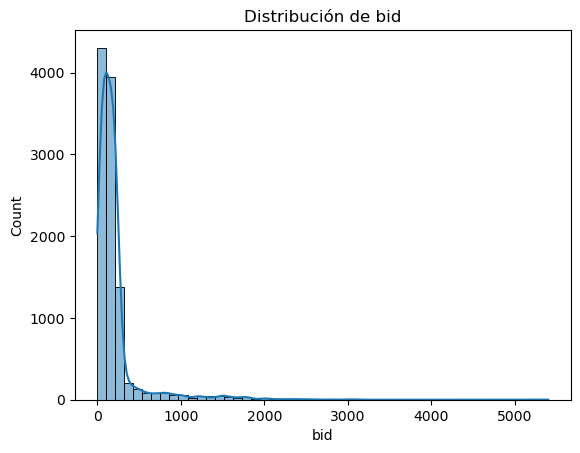

In [21]:
# Visualizar distribución
sns.histplot(df['bid'], bins=50, kde=True)
plt.title('Distribución de bid')
plt.show()

In [22]:
# Capping a un máximo (ej: 1000) o transformar
df['bid'] = df['bid'].clip(upper=1000)
# También puedes probar log-transform
df['bid_log'] = np.log1p(df['bid'])

### Crear una columna en log de la variable ``openbid``

c:\Users\jeane_bkpplgv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


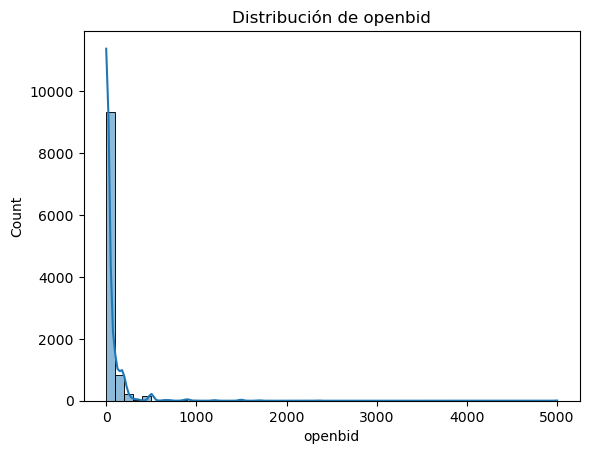

In [23]:
sns.histplot(df['openbid'], bins=50, kde=True)
plt.title('Distribución de openbid')
plt.show()

In [24]:
# Capping: limitar a un máximo razonable (ej: 500)
df['openbid'] = df['openbid'].clip(upper=1000)

# Opción alternativa: aplicar log-transform si hay muchos valores extremos

df['openbid_log'] = np.log1p(df['openbid'])  # crea nueva variable log-transformada

In [25]:
# Estadísticas básicas
df.describe().round(2)

,bid,bidtime,bidderrate,openbid,price,auctiontype,bid_log,openbid_log
count,10654.00,10654.00,10654.00,10654.00,10654.00,10654.00,10654.00,10654.00
mean,186.26,3.98,18.38,48.71,335.64,5.94,4.75,2.11
std,207.52,2.35,28.58,118.19,433.94,1.59,1.09,1.91
min,0.01,0.00,0.00,0.01,26.00,3.00,0.01,0.01
25%,72.00,1.95,1.00,1.00,187.52,5.00,4.29,0.69
50%,140.00,4.13,5.00,4.99,229.04,7.00,4.95,1.79
75%,210.00,6.44,21.00,50.00,255.00,7.00,5.35,3.93
max,1000.00,7.00,100.00,1000.00,5400.00,7.00,6.91,6.91


### Agrupar por subasta ( ``auctionid``)

In [26]:
# Identificar filas ganadoras por subasta (máximo bid)
idx_ganadores = df.groupby('auctionid')['bid'].idxmax()

# Extraer info del postor ganador
df_ganadores = df.loc[idx_ganadores, ['auctionid', 'bidder', 'bidderrate', 'bidtime']]
df_ganadores = df_ganadores.rename(columns={
    'bidder': 'bidder_ganador',
    'bidderrate': 'bidderrate_ganador',
    'bidtime': 'bidtime_ganador'
})

df_ganadores

C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_16680\2212672483.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_ganadores = df.groupby('auctionid')['bid'].idxmax()


,auctionid,bidder_ganador,bidderrate_ganador,bidtime_ganador
3392,1638843936,carloss8055,5,5.226377
3397,1638844284,njbirdmom,33,1.252407
3413,1638844464,adammurry,5,6.999745
3424,1638844729,sylvesterii,82,6.999213
2788,1638893549,eli.flint@flightsafety.co,4,2.909826
...,...,...,...,...
491,8215558653,wattscrew1,8,2.999815
510,8215571039,lambonius1,0,2.997442
527,8215582227,ultimatum_man,2,2.999664
538,8215605488,pgauctions,16,2.586493


In [27]:
# Ahora unimos esta info con el DataFrame agrupado
df_agg = df.groupby('auctionid').agg({
    'bid': 'max',
    'bid_log': 'max',
    'openbid': 'first',
    'openbid_log': 'first',
    'bidtime': 'mean',
    'bidderrate': 'mean',
    'price': 'first',
    'item': 'first',
    'auctiontype': 'first'
}).reset_index()

# Merge con los datos del postor ganador
df_agg = df_agg.merge(df_ganadores, on='auctionid', how='left')
df_agg


C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_16680\1130077058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby('auctionid').agg({


,auctionid,bid,bid_log,openbid,openbid_log,bidtime,bidderrate,price,item,auctiontype,bidder_ganador,bidderrate_ganador,bidtime_ganador
0,1638843936,1000.00,6.908755,500.00,6.216606,4.378416,26.857143,1625.00,cartier,7,carloss8055,5,5.226377
1,1638844284,500.00,6.216606,200.00,5.303305,1.244913,16.500000,500.00,cartier,7,njbirdmom,33,1.252407
2,1638844464,740.00,6.608001,300.00,5.707110,6.225163,9.125000,740.00,cartier,7,adammurry,5,6.999745
3,1638844729,320.00,5.771441,225.00,5.420535,6.895609,29.636364,320.00,cartier,7,sylvesterii,82,6.999213
4,1638893549,177.50,5.184589,99.00,4.605170,2.588555,1.600000,177.50,cartier,3,eli.flint@flightsafety.co,4,2.909826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,8215558653,135.29,4.914785,55.00,4.025352,2.313801,8.285714,135.29,xbox,3,wattscrew1,8,2.999815
623,8215571039,150.00,5.017280,50.00,3.931826,2.144623,0.600000,150.00,xbox,3,lambonius1,0,2.997442
624,8215582227,152.50,5.033701,60.00,4.110874,2.600727,6.125000,152.50,xbox,3,ultimatum_man,2,2.999664
625,8215605488,61.00,4.127134,0.99,0.688135,1.680259,39.454545,61.00,xbox,3,pgauctions,16,2.586493


In [28]:
# Calcular número de postores únicos y número de pujas por subasta
df_postores_pujas = df.groupby('auctionid').agg(
    n_postores=('bidder', 'nunique'),
    n_pujas=('bidder', 'count')
).reset_index()

# Unir ambas columnas al dataset agregado
df_agg = df_agg.merge(df_postores_pujas, on='auctionid', how='left')
df_agg

C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_16680\1046591850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_postores_pujas = df.groupby('auctionid').agg(


,auctionid,bid,bid_log,openbid,openbid_log,bidtime,bidderrate,price,item,auctiontype,bidder_ganador,bidderrate_ganador,bidtime_ganador,n_postores,n_pujas
0,1638843936,1000.00,6.908755,500.00,6.216606,4.378416,26.857143,1625.00,cartier,7,carloss8055,5,5.226377,5,7
1,1638844284,500.00,6.216606,200.00,5.303305,1.244913,16.500000,500.00,cartier,7,njbirdmom,33,1.252407,2,2
2,1638844464,740.00,6.608001,300.00,5.707110,6.225163,9.125000,740.00,cartier,7,adammurry,5,6.999745,5,16
3,1638844729,320.00,5.771441,225.00,5.420535,6.895609,29.636364,320.00,cartier,7,sylvesterii,82,6.999213,2,11
4,1638893549,177.50,5.184589,99.00,4.605170,2.588555,1.600000,177.50,cartier,3,eli.flint@flightsafety.co,4,2.909826,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,8215558653,135.29,4.914785,55.00,4.025352,2.313801,8.285714,135.29,xbox,3,wattscrew1,8,2.999815,9,14
623,8215571039,150.00,5.017280,50.00,3.931826,2.144623,0.600000,150.00,xbox,3,lambonius1,0,2.997442,4,20
624,8215582227,152.50,5.033701,60.00,4.110874,2.600727,6.125000,152.50,xbox,3,ultimatum_man,2,2.999664,7,16
625,8215605488,61.00,4.127134,0.99,0.688135,1.680259,39.454545,61.00,xbox,3,pgauctions,16,2.586493,10,11


In [29]:
# Agrupar los menos frecuentes como 'otros'
top_items = df_agg['item'].value_counts().nlargest(5).index
df_agg['item'] = df_agg['item'].where(df_agg['item'].isin(top_items), 'otros')

# Convertir a dummies
df_agg = pd.get_dummies(df_agg, columns=['item'], drop_first=True)
df_agg


,auctionid,bid,bid_log,openbid,openbid_log,bidtime,bidderrate,price,auctiontype,bidder_ganador,bidderrate_ganador,bidtime_ganador,n_postores,n_pujas,item_palm,item_xbox
0,1638843936,1000.00,6.908755,500.00,6.216606,4.378416,26.857143,1625.00,7,carloss8055,5,5.226377,5,7,False,False
1,1638844284,500.00,6.216606,200.00,5.303305,1.244913,16.500000,500.00,7,njbirdmom,33,1.252407,2,2,False,False
2,1638844464,740.00,6.608001,300.00,5.707110,6.225163,9.125000,740.00,7,adammurry,5,6.999745,5,16,False,False
3,1638844729,320.00,5.771441,225.00,5.420535,6.895609,29.636364,320.00,7,sylvesterii,82,6.999213,2,11,False,False
4,1638893549,177.50,5.184589,99.00,4.605170,2.588555,1.600000,177.50,3,eli.flint@flightsafety.co,4,2.909826,4,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,8215558653,135.29,4.914785,55.00,4.025352,2.313801,8.285714,135.29,3,wattscrew1,8,2.999815,9,14,False,True
623,8215571039,150.00,5.017280,50.00,3.931826,2.144623,0.600000,150.00,3,lambonius1,0,2.997442,4,20,False,True
624,8215582227,152.50,5.033701,60.00,4.110874,2.600727,6.125000,152.50,3,ultimatum_man,2,2.999664,7,16,False,True
625,8215605488,61.00,4.127134,0.99,0.688135,1.680259,39.454545,61.00,3,pgauctions,16,2.586493,10,11,False,True


## Modelo RandomForestRegressor 

Se utiliza un modelo supervisado de regresión, específicamente un Random Forest Regressor, para predecir el precio final de una subasta a partir de variables como el precio inicial, la puja máxima, la reputación de los postores y el tipo de producto. Este modelo es ideal porque maneja bien relaciones no lineales, outliers y variables mixtas, ofreciendo predicciones precisas y buena interpretabilidad.


In [30]:
# Excluir solo lo necesario
columnas_excluir = ['auctionid', 'price', 'bidder_ganador']  # No usamos identificadores ni strings

X = df_agg.drop(columns=columnas_excluir)
y = df_agg['price']


In [31]:
# Separar los datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Entrenar el modelo

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
# Evaluar el rendimiento

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 45.22
RMSE: 164.12
R² Score: 0.89


- MAE (Error absoluto medio): 45.22
En promedio, el modelo se equivoca por 45 unidades monetarias al predecir el precio final. Muy aceptable en este contexto.

- RMSE (Error cuadrático medio): 164.12
Más sensible a grandes errores. Muestra que hay algunos precios con mayor variabilidad, pero sigue siendo razonable.

- R² Score: 0.89
El modelo explica el 89% de la variabilidad del precio final, lo cual es excelente. Significa que la mayoría de las predicciones están cerca del valor real.

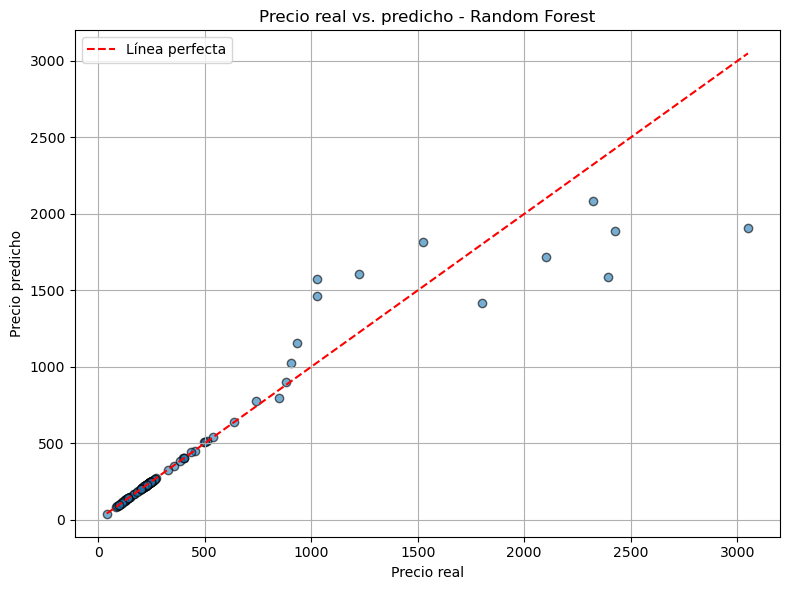

In [34]:
# Gráfico: Precio real vs. Precio predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea perfecta')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Precio real vs. predicho - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelo GradientBoostingRegressor 

Se utilizó un modelo Gradient Boosting Regressor, un algoritmo supervisado de regresión que construye árboles de forma secuencial, corrigiendo los errores del modelo anterior en cada paso. Es especialmente útil cuando se busca alta precisión, ya que combina muchos árboles débiles para formar un modelo fuerte. Se eligió este modelo porque suele superar en rendimiento a Random Forest en datasets estructurados, capturando relaciones complejas y reduciendo errores de predicción.

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Crear y entrenar el modelo
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predicción
y_pred_gb = gb_model.predict(X_test)

In [36]:
# Evaluación
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb:.2f}")
print(f"Gradient Boosting RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting R²: {r2_gb:.2f}")


Gradient Boosting MAE: 48.69
Gradient Boosting RMSE: 152.36
Gradient Boosting R²: 0.91


- Aunque el MAE aumentó ligeramente (posiblemente por algunos errores más "uniformes"), el RMSE bajó y el R² subió a 0.91, lo que significa que el modelo generaliza mejor y explica más variabilidad.

- Gradient Boosting es ahora tu mejor modelo.

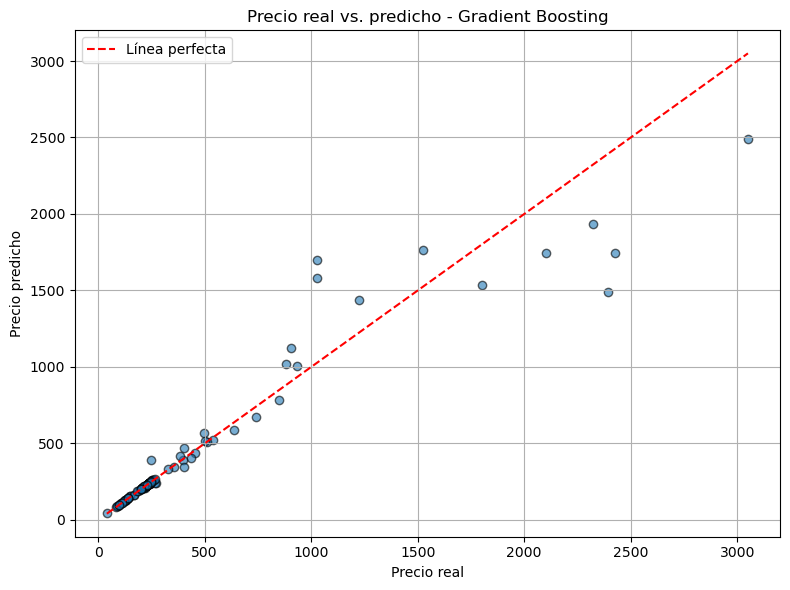

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea perfecta')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Precio real vs. predicho - Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


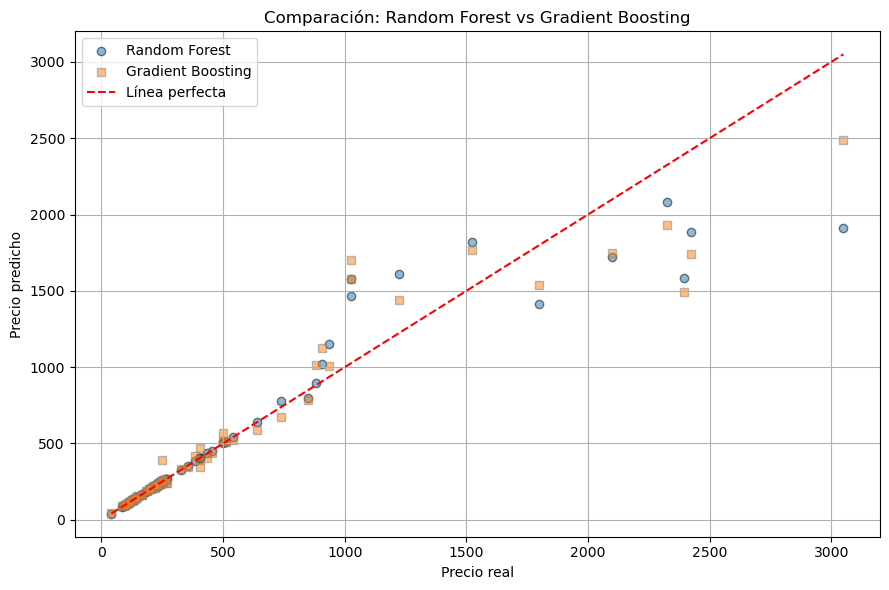

In [38]:
import matplotlib.pyplot as plt

# Asegúrate de tener ya definidas las siguientes variables:
# y_test, y_pred         → del modelo Random Forest
# y_pred_gb              → del modelo Gradient Boosting

plt.figure(figsize=(9, 6))

# Random Forest
plt.scatter(y_test, y_pred, alpha=0.5, label='Random Forest', edgecolors='k')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label='Gradient Boosting', edgecolors='gray', marker='s')

# Línea perfecta
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea perfecta')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación: Random Forest vs Gradient Boosting')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelo Regresión simple 

In [39]:
from sklearn.linear_model import LinearRegression

# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [40]:
r2_lr = r2_score(y_test, lr_model.predict(X_test))

In [44]:
y_pred_lr = lr_model.predict(X_test)


In [41]:
# Mostrar resultados
print(f"🌲 Random Forest R²: {round(r2, 2)}")
print(f"🌱 Gradient Boosting R²: {round(r2_gb, 2)}")
print(f"📈 Regresión Lineal R²: {round(r2_lr, 2)}")

🌲 Random Forest R²: 0.89
🌱 Gradient Boosting R²: 0.91
📈 Regresión Lineal R²: 0.87


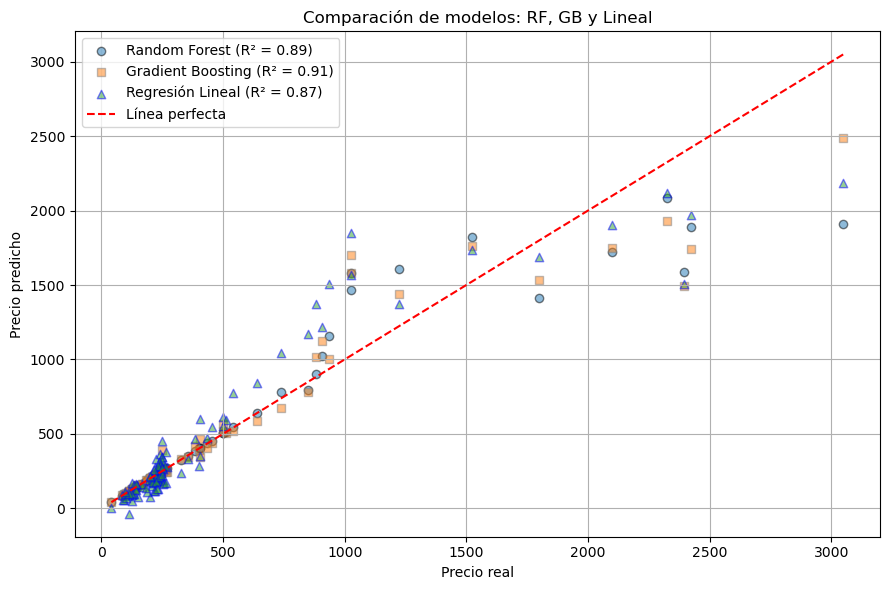

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculamos los R²
r2_rf = r2_score(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred_gb)
r2_lr = r2_score(y_test, y_pred_lr)

plt.figure(figsize=(9, 6))

# Random Forest
plt.scatter(y_test, y_pred, alpha=0.5, label=f'Random Forest (R² = {r2_rf:.2f})', edgecolors='k')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label=f'Gradient Boosting (R² = {r2_gb:.2f})', edgecolors='gray', marker='s')

# Regresión Lineal
plt.scatter(y_test, y_pred_lr, alpha=0.5, label=f'Regresión Lineal (R² = {r2_lr:.2f})', edgecolors='blue', marker='^')

# Línea perfecta
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Línea perfecta')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación de modelos: RF, GB y Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


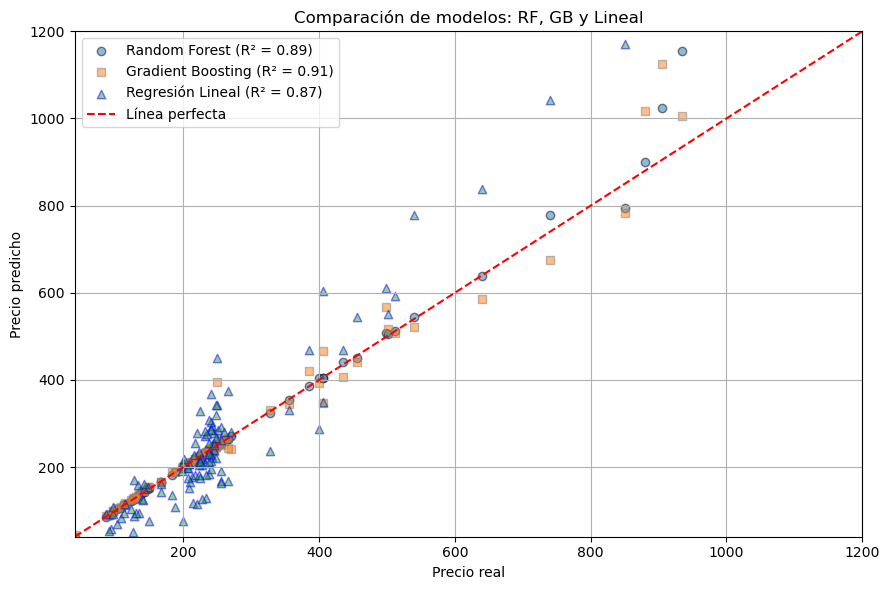

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculamos los R²
r2_rf = r2_score(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred_gb)
r2_lr = r2_score(y_test, y_pred_lr)

plt.figure(figsize=(9, 6))

# Random Forest
plt.scatter(y_test, y_pred, alpha=0.5, label=f'Random Forest (R² = {r2_rf:.2f})', edgecolors='k')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, label=f'Gradient Boosting (R² = {r2_gb:.2f})', edgecolors='gray', marker='s')

# Regresión Lineal
plt.scatter(y_test, y_pred_lr, alpha=0.5, label=f'Regresión Lineal (R² = {r2_lr:.2f})', edgecolors='blue', marker='^')

# Línea perfecta
plt.plot([40, 1200], [40, 1200], '--r', label='Línea perfecta')

plt.xlim(40, 1200)
plt.ylim(40, 1200)

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación de modelos: RF, GB y Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Teoría de Juegos

## Siempre gana C

In [160]:
import random
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

def juego_siempre_gana_C():
    # 1. Crear datos simulados para entrenar los modelos
    np.random.seed(42)
    df = pd.DataFrame({
        "openbid": np.random.randint(10, 80, size=600),
        "n_postores": np.random.randint(2, 15, size=600),
        "bidderrate": np.random.randint(0, 100, size=600),  # Historico de pujas
        "auctiontype": np.random.choice([3, 4, 7], size=600),
        "price": np.random.randint(30, 150, size=600)
    })

    # 2. Preparar datos para entrenamiento
    X = df.drop(columns="price")
    y = df["price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Entrenar los tres modelos
    rf_model = RandomForestRegressor(random_state=42)
    gb_model = GradientBoostingRegressor(random_state=42)
    lr_model = LinearRegression()

    rf_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)

    # 4. Predicción de los precios con los tres modelos
    y_pred_rf = rf_model.predict(X_test)
    y_pred_gb = gb_model.predict(X_test)
    y_pred_lr = lr_model.predict(X_test)

    # 5. Simulación de una subasta
    subasta_actual = {
        "openbid": 45,
        "n_postores": 3,
        "bidderrate": 35,  # Asignar un valor de bidderrate para la simulación
        "auctiontype": 4
    }

    # Predicción de los precios con los tres modelos
    input_modelo = pd.DataFrame([subasta_actual])

    # Usamos las predicciones del modelo para cada jugador, sumamos 10 para simular la puja máxima y limitamos a 100
    # Ahora ajustamos la predicción basada en el bidderrate
    pred_rf = min(round(rf_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_gb = min(round(gb_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_lr = min(round(lr_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)

    # 6. Asignamos las pujas de acuerdo a las predicciones de cada modelo
    jugadores = {
        "A (usa modelo RF)": pred_rf,  # Jugador A usa el modelo Random Forest
        "B (usa modelo GB)": pred_gb,  # Jugador B usa el modelo Gradient Boosting
        "C (usa modelo LR)": pred_lr   # Jugador C usa el modelo de Regresión Lineal
    }

    # 7. Simulación del proceso de subasta
    pujas_actuales = {jugador: 0 for jugador in jugadores}
    puja_maxima_actual = 0
    ganador_actual = None
    etapas = []
    incremento_minimo = 1
    ronda = 1
    jugador_que_pujo = None  # Variable para recordar quién fue el último jugador que pujò

    while True:
        cambios = False
        jugadores_activos = 0  # contar jugadores que aún pueden pujar
        jugadores_que_pujaron = []  # Lista para registrar los jugadores que han pujado

        for jugador, valoracion in jugadores.items():
            # El jugador no puede pujar dos veces seguidas, debe haber otro jugador que haya pujado
            if jugador == jugador_que_pujo:
                continue

            if valoracion > puja_maxima_actual:
                jugadores_activos += 1
                nueva_puja = min(valoracion, puja_maxima_actual + incremento_minimo)
                pujas_actuales[jugador] = nueva_puja
                if nueva_puja > puja_maxima_actual:
                    puja_maxima_actual = nueva_puja
                    ganador_actual = jugador
                    cambios = True
                    etapas.append({
                        "ronda": ronda,
                        "jugador": jugador,
                        "nueva_puja": nueva_puja
                    })
                    ronda += 1
                jugadores_que_pujaron.append(jugador)

        # Si no hay cambios o no hay más jugadores que puedan pujar, se termina
        if not cambios:
            break

        # Actualizar el último jugador que pujò
        if jugadores_que_pujaron:
            jugador_que_pujo = jugadores_que_pujaron[-1]

    # 8. Calcular el precio pagado (segundo monto más alto + incremento mínimo)
    pujas_finales = sorted(pujas_actuales.values(), reverse=True)
    if len(pujas_finales) > 1:
        precio_pagado = pujas_finales[1] + incremento_minimo
    else:
        precio_pagado = puja_maxima_actual

    # 9. Mostrar resultados
    print("📊 Subasta (input del modelo):", subasta_actual)
    print(f"🤖 Predicción del modelo RF: ${round(pred_rf, 2)}")
    print(f"🤖 Predicción del modelo GB: ${round(pred_gb, 2)}")
    print(f"🤖 Predicción del modelo LR: ${round(pred_lr, 2)}")

    print("\n🎯 Valoraciones privadas:")
    for jugador, val in jugadores.items():
        print(f"  {jugador}: ${val}")

    print("\n🔁 Últimas 5 etapas del juego:")
    for etapa in etapas[-5:]:
        print(f"  Ronda {etapa['ronda']}: {etapa['jugador']} puja ${etapa['nueva_puja']}")

    # Verificamos si hay un ganador antes de intentar acceder a sus datos
    if ganador_actual:
        print(f"\n🏆 Ganador: {ganador_actual}")
        print(f"💰 Puja máxima del ganador: ${jugadores[ganador_actual]}")
        print(f"🧾 Precio pagado: ${precio_pagado}")
    else:
        print("\n🏆 No hubo ganador.")

    print(f"📈 R² del modelo RF: {round(r2_score(y_test, y_pred_rf), 2)}")
    print(f"📈 R² del modelo GB: {round(r2_score(y_test, y_pred_gb), 2)}")
    print(f"📈 R² del modelo LR: {round(r2_score(y_test, y_pred_lr), 2)}")

# Llamar a la función para ejecutar un solo juego
juego_siempre_gana_C()

siempre_gana_C = juego_siempre_gana_C()
siempre_gana_C


📊 Subasta (input del modelo): {'openbid': 45, 'n_postores': 3, 'bidderrate': 35, 'auctiontype': 4}
🤖 Predicción del modelo RF: $75
🤖 Predicción del modelo GB: $90
🤖 Predicción del modelo LR: $100

🎯 Valoraciones privadas:
  A (usa modelo RF): $75
  B (usa modelo GB): $90
  C (usa modelo LR): $100

🔁 Últimas 5 etapas del juego:
  Ronda 87: C (usa modelo LR) puja $87
  Ronda 88: B (usa modelo GB) puja $88
  Ronda 89: C (usa modelo LR) puja $89
  Ronda 90: B (usa modelo GB) puja $90
  Ronda 91: C (usa modelo LR) puja $91

🏆 Ganador: C (usa modelo LR)
💰 Puja máxima del ganador: $100
🧾 Precio pagado: $91
📈 R² del modelo RF: -0.15
📈 R² del modelo GB: -0.17
📈 R² del modelo LR: -0.01
📊 Subasta (input del modelo): {'openbid': 45, 'n_postores': 3, 'bidderrate': 35, 'auctiontype': 4}
🤖 Predicción del modelo RF: $75
🤖 Predicción del modelo GB: $90
🤖 Predicción del modelo LR: $100

🎯 Valoraciones privadas:
  A (usa modelo RF): $75
  B (usa modelo GB): $90
  C (usa modelo LR): $100

🔁 Últimas 5 etap

In [165]:
import random
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 1. Crear datos simulados para entrenar los modelos
np.random.seed(42)
df = pd.DataFrame({
    "openbid": np.random.randint(10, 80, size=600),
    "n_postores": np.random.randint(2, 15, size=600),
    "bidderrate": np.random.randint(0, 100, size=600),  # Historico de pujas
    "auctiontype": np.random.choice([3, 4, 7], size=600),
    "price": np.random.randint(30, 150, size=600)
})

# 2. Preparar datos para entrenamiento
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar los tres modelos
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 4. Predicción de los precios con los tres modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# 5. Función del juego
def siempre_gana_C():
    subasta_actual = {
        "openbid": 45,
        "n_postores": 3,
        "bidderrate": 35,  # Asignar un valor de bidderrate para la simulación
        "auctiontype": 4
    }

    # Predicción de los precios con los tres modelos
    input_modelo = pd.DataFrame([subasta_actual])

    # Usamos las predicciones del modelo para cada jugador, sumamos 10 para simular la puja máxima y limitamos a 100
    # Ahora ajustamos la predicción basada en el bidderrate
    pred_rf = min(round(rf_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_gb = min(round(gb_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_lr = min(round(lr_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)

    # 6. Asignamos las pujas de acuerdo a las predicciones de cada modelo
    jugadores = {
        "A (usa modelo RF)": pred_rf,  # Jugador A usa el modelo Random Forest
        "B (usa modelo GB)": pred_gb,  # Jugador B usa el modelo Gradient Boosting
        "C (usa modelo LR)": pred_lr   # Jugador C usa el modelo de Regresión Lineal
    }

    # 7. Simulación del proceso de subasta
    pujas_actuales = {jugador: 0 for jugador in jugadores}
    puja_maxima_actual = 0
    ganador_actual = None
    incremento_minimo = 1
    ronda = 1
    jugador_que_pujo = None  # Variable para recordar quién fue el último jugador que pujò

    while True:
        cambios = False
        jugadores_que_pujaron = []  # Lista para registrar los jugadores que han pujado

        for jugador, valoracion in jugadores.items():
            # El jugador no puede pujar dos veces seguidas, debe haber otro jugador que haya pujado
            if jugador == jugador_que_pujo:
                continue

            if valoracion > puja_maxima_actual:
                nueva_puja = min(valoracion, puja_maxima_actual + incremento_minimo)
                pujas_actuales[jugador] = nueva_puja
                if nueva_puja > puja_maxima_actual:
                    puja_maxima_actual = nueva_puja
                    ganador_actual = jugador
                    cambios = True
                jugadores_que_pujaron.append(jugador)

        # Si no hay cambios o no hay más jugadores que puedan pujar, se termina
        if not cambios:
            break

        # Actualizar el último jugador que pujò
        if jugadores_que_pujaron:
            jugador_que_pujo = jugadores_que_pujaron[-1]

    # 8. Calcular el precio pagado (segundo monto más alto + incremento mínimo)
    pujas_finales = sorted(pujas_actuales.values(), reverse=True)
    if len(pujas_finales) > 1:
        precio_pagado = pujas_finales[1] + incremento_minimo
    else:
        precio_pagado = puja_maxima_actual

    # Retornar el ganador
    return ganador_actual

# 9. Ejecutar 100 juegos
def repetir_juego(n_repeticiones=100):
    resultados = {"A (usa modelo RF)": 0, "B (usa modelo GB)": 0, "C (usa modelo LR)": 0}

    for i in range(n_repeticiones):
        ganador = siempre_gana_C()
        resultados[ganador] += 1
    
    return resultados

# Llamar a la función para ejecutar el juego 100 veces y mostrar los resultados
resultados = repetir_juego(100)
print("Simulación 1: Resultados después de 100 juegos:")
for jugador, veces in resultados.items():
    print(f"{jugador} ganó {veces} veces.")


Simulación 1: Resultados después de 100 juegos:
A (usa modelo RF) ganó 0 veces.
B (usa modelo GB) ganó 0 veces.
C (usa modelo LR) ganó 100 veces.


---

#  que ganae el mejor modelo

In [164]:
import random
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 1. Crear datos simulados para entrenar los modelos
np.random.seed(42)
df = pd.DataFrame({
    "openbid": np.random.randint(10, 80, size=600),
    "n_postores": np.random.randint(2, 15, size=600),
    "bidderrate": np.random.randint(0, 100, size=600),
    "auctiontype": np.random.choice([3, 4, 7], size=600),
    "price": np.random.randint(30, 150, size=600)
})

# 2. Preparar datos para entrenamiento
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar los tres modelos
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 4. Predicción de los precios con los tres modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# 5. Simulación de una subasta
subasta_actual = {
    "openbid": 45,
    "n_postores": 3,
    "bidderrate": 35,  # Asignar un valor de bidderrate para la simulación
    "auctiontype": 4
}

# Predicción de los precios con los tres modelos
input_modelo = pd.DataFrame([subasta_actual])

# Usamos las predicciones del modelo para cada jugador, sumamos 10 para simular la puja máxima y limitamos a 100
# Ahora ajustamos la predicción basada en el bidderrate
pred_rf = min(round(rf_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
pred_gb = min(round(gb_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
pred_lr = min(round(lr_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)

# 6. Valoración privada aleatoria para cada jugador (con valor máximo)
valoracion_privada_A = random.randint(50, 90)  # A tiene su valor privado entre 50 y 90
valoracion_privada_B = random.randint(50, 90)  # B tiene su valor privado entre 50 y 90
valoracion_privada_C = random.randint(50, 90)  # C tiene su valor privado entre 50 y 90

# 7. Asignamos las pujas de acuerdo a las predicciones de cada modelo y la valoración privada
jugadores = {
    "A (usa modelo RF)": min(pred_rf, valoracion_privada_A),  # Jugador A usa el modelo Random Forest
    "B (usa modelo GB)": min(pred_gb, valoracion_privada_B),  # Jugador B usa el modelo Gradient Boosting
    "C (usa modelo LR)": min(pred_lr, valoracion_privada_C)   # Jugador C usa el modelo de Regresión Lineal
}

# 8. Simulación del proceso de subasta
pujas_actuales = {jugador: 0 for jugador in jugadores}
puja_maxima_actual = 0
ganador_actual = None
etapas = []
incremento_minimo = 1
ronda = 1
jugador_que_pujo = None  # Variable para recordar quién fue el último jugador que pujò

while True:
    cambios = False
    jugadores_activos = 0  # contar jugadores que aún pueden pujar
    jugadores_que_pujaron = []  # Lista para registrar los jugadores que han pujado

    for jugador, valoracion in jugadores.items():
        # El jugador no puede pujar dos veces seguidas, debe haber otro jugador que haya pujado
        if jugador == jugador_que_pujo:
            continue
        
        if valoracion > puja_maxima_actual:
            jugadores_activos += 1
            nueva_puja = min(valoracion, puja_maxima_actual + incremento_minimo)
            pujas_actuales[jugador] = nueva_puja
            if nueva_puja > puja_maxima_actual:
                puja_maxima_actual = nueva_puja
                ganador_actual = jugador
                cambios = True
                etapas.append({
                    "ronda": ronda,
                    "jugador": jugador,
                    "nueva_puja": nueva_puja
                })
                ronda += 1
            jugadores_que_pujaron.append(jugador)
    
    # Si no hay cambios o no hay más jugadores que puedan pujar, se termina
    if not cambios:
        break
    
    # Actualizar el último jugador que pujò
    if jugadores_que_pujaron:
        jugador_que_pujo = jugadores_que_pujaron[-1]

# 9. Calcular el precio pagado (segundo monto más alto + incremento mínimo)
pujas_finales = sorted(pujas_actuales.values(), reverse=True)
if len(pujas_finales) > 1:
    precio_pagado = pujas_finales[1] + incremento_minimo
else:
    precio_pagado = puja_maxima_actual

# 10. Mostrar resultados
print("📊 Subasta (input del modelo):", subasta_actual)
print(f"🤖 Predicción del modelo RF: ${round(pred_rf, 2)}")
print(f"🤖 Predicción del modelo GB: ${round(pred_gb, 2)}")
print(f"🤖 Predicción del modelo LR: ${round(pred_lr, 2)}")

print("\n🎯 Valoraciones privadas:")
for jugador, val in jugadores.items():
    print(f"  {jugador}: ${val}")

print("\n🔁 Últimas 5 etapas del juego:")
for etapa in etapas[-5:]:
    print(f"  Ronda {etapa['ronda']}: {etapa['jugador']} puja ${etapa['nueva_puja']}")

# Verificamos si hay un ganador antes de intentar acceder a sus datos
if ganador_actual:
    print(f"\n🏆 Ganador: {ganador_actual}")
    print(f"💰 Puja máxima del ganador: ${jugadores[ganador_actual]}")
    print(f"🧾 Precio pagado: ${precio_pagado}")
else:
    print("\n🏆 No hubo ganador.")
    
print(f"📈 R² del modelo RF: {round(r2_score(y_test, y_pred_rf), 2)}")
print(f"📈 R² del modelo GB: {round(r2_score(y_test, y_pred_gb), 2)}")
print(f"📈 R² del modelo LR: {round(r2_score(y_test, y_pred_lr), 2)}")


📊 Subasta (input del modelo): {'openbid': 45, 'n_postores': 3, 'bidderrate': 35, 'auctiontype': 4}
🤖 Predicción del modelo RF: $75
🤖 Predicción del modelo GB: $90
🤖 Predicción del modelo LR: $100

🎯 Valoraciones privadas:
  A (usa modelo RF): $51
  B (usa modelo GB): $88
  C (usa modelo LR): $61

🔁 Últimas 5 etapas del juego:
  Ronda 58: B (usa modelo GB) puja $58
  Ronda 59: C (usa modelo LR) puja $59
  Ronda 60: B (usa modelo GB) puja $60
  Ronda 61: C (usa modelo LR) puja $61
  Ronda 62: B (usa modelo GB) puja $62

🏆 Ganador: B (usa modelo GB)
💰 Puja máxima del ganador: $88
🧾 Precio pagado: $62
📈 R² del modelo RF: -0.15
📈 R² del modelo GB: -0.17
📈 R² del modelo LR: -0.01


In [170]:
import random
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 1. Crear datos simulados para entrenar los modelos
np.random.seed(42)
df = pd.DataFrame({
    "openbid": np.random.randint(10, 80, size=600),
    "n_postores": np.random.randint(2, 15, size=600),
    "bidderrate": np.random.randint(0, 100, size=600),  # Historico de pujas
    "auctiontype": np.random.choice([3, 4, 7], size=600),
    "price": np.random.randint(30, 150, size=600)
})

# 2. Preparar datos para entrenamiento
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar los tres modelos (esto solo debe hacerse una vez)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 4. Simulación de 100 juegos
juegos = 100
resultados = {"A (usa modelo RF)": 0, "B (usa modelo GB)": 0, "C (usa modelo LR)": 0}

for _ in range(juegos):
    # 5. Simulación de una subasta
    subasta_actual = {
        "openbid": 45,
        "n_postores": 3,
        "bidderrate": 35,  # Asignar un valor de bidderrate para la simulación
        "auctiontype": 4
    }

    # Predicción de los precios con los tres modelos
    input_modelo = pd.DataFrame([subasta_actual])

    # Usamos las predicciones del modelo para cada jugador, sumamos 10 para simular la puja máxima y limitamos a 100
    # Ahora ajustamos la predicción basada en el bidderrate
    pred_rf = min(round(rf_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_gb = min(round(gb_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)
    pred_lr = min(round(lr_model.predict(input_modelo)[0] + 10 + (subasta_actual["bidderrate"] * 0.1)), 100)

    # 6. Valoración privada aleatoria para cada jugador (con valor máximo)
    valoracion_privada_A = random.randint(50, 90)  # A tiene su valor privado entre 50 y 90
    valoracion_privada_B = random.randint(50, 90)  # B tiene su valor privado entre 50 y 90
    valoracion_privada_C = random.randint(50, 90)  # C tiene su valor privado entre 50 y 90

    # 7. Asignamos las pujas de acuerdo a las predicciones de cada modelo y la valoración privada
    jugadores = {
        "A (usa modelo RF)": min(pred_rf, valoracion_privada_A),  # Jugador A usa el modelo Random Forest
        "B (usa modelo GB)": min(pred_gb, valoracion_privada_B),  # Jugador B usa el modelo Gradient Boosting
        "C (usa modelo LR)": min(pred_lr, valoracion_privada_C)   # Jugador C usa el modelo de Regresión Lineal
    }

    # 8. Simulación del proceso de subasta
    pujas_actuales = {jugador: 0 for jugador in jugadores}
    puja_maxima_actual = 0
    ganador_actual = None
    incremento_minimo = 1
    ronda = 1
    jugador_que_pujo = None  # Variable para recordar quién fue el último jugador que pujò

    while True:
        cambios = False
        jugadores_activos = 0  # contar jugadores que aún pueden pujar
        jugadores_que_pujaron = []  # Lista para registrar los jugadores que han pujado

        for jugador, valoracion in jugadores.items():
            # El jugador no puede pujar dos veces seguidas, debe haber otro jugador que haya pujado
            if jugador == jugador_que_pujo:
                continue

            if valoracion > puja_maxima_actual:
                jugadores_activos += 1
                nueva_puja = min(valoracion, puja_maxima_actual + incremento_minimo)
                pujas_actuales[jugador] = nueva_puja
                if nueva_puja > puja_maxima_actual:
                    puja_maxima_actual = nueva_puja
                    ganador_actual = jugador
                    cambios = True
                    ronda += 1
                jugadores_que_pujaron.append(jugador)

        # Si no hay cambios o no hay más jugadores que puedan pujar, se termina
        if not cambios:
            break

        # Actualizar el último jugador que pujò
        if jugadores_que_pujaron:
            jugador_que_pujo = jugadores_que_pujaron[-1]

    # 9. Calcular el precio pagado (segundo monto más alto + incremento mínimo)
    pujas_finales = sorted(pujas_actuales.values(), reverse=True)
    if len(pujas_finales) > 1:
        precio_pagado = pujas_finales[1] + incremento_minimo
    else:
        precio_pagado = puja_maxima_actual

    # 10. Registrar el ganador
    if ganador_actual:
        resultados[ganador_actual] += 1

# 11. Mostrar los resultados después de 100 juegos
print("\nSimulación 2: resultados después de 100 juegos:")
for jugador, victorias in resultados.items():
    print(f"{jugador} ganó {victorias} veces.")



Simulación 2: resultados después de 100 juegos:
A (usa modelo RF) ganó 22 veces.
B (usa modelo GB) ganó 45 veces.
C (usa modelo LR) ganó 33 veces.
